In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos
data = pd.read_csv('datos_limpios.csv')


C:\Users\arcem\AppData\Local\Temp\ipykernel_22460\927851972.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# Estadísticas descriptivas
descripcion = data.describe()
print("Estadísticas descriptivas:")
print(descripcion)

Estadísticas descriptivas:
                 ID       LIMIT_BAL           SEX     EDUCATION      MARRIAGE  \
count  30000.000000    30000.000000  30000.000000  30000.000000  30000.000000   
mean   15000.500000   167484.322667      1.603733      1.853133      1.551867   
std     8660.398374   129747.661567      0.489129      0.790349      0.521970   
min        1.000000    10000.000000      1.000000      0.000000      0.000000   
25%     7500.750000    50000.000000      1.000000      1.000000      1.000000   
50%    15000.500000   140000.000000      2.000000      2.000000      2.000000   
75%    22500.250000   240000.000000      2.000000      2.000000      2.000000   
max    30000.000000  1000000.000000      2.000000      6.000000      3.000000   

                AGE         PAY_0         PAY_2         PAY_3         PAY_4  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean      35.485500     -0.016700     -0.133767     -0.166200     -0.220667   
std   

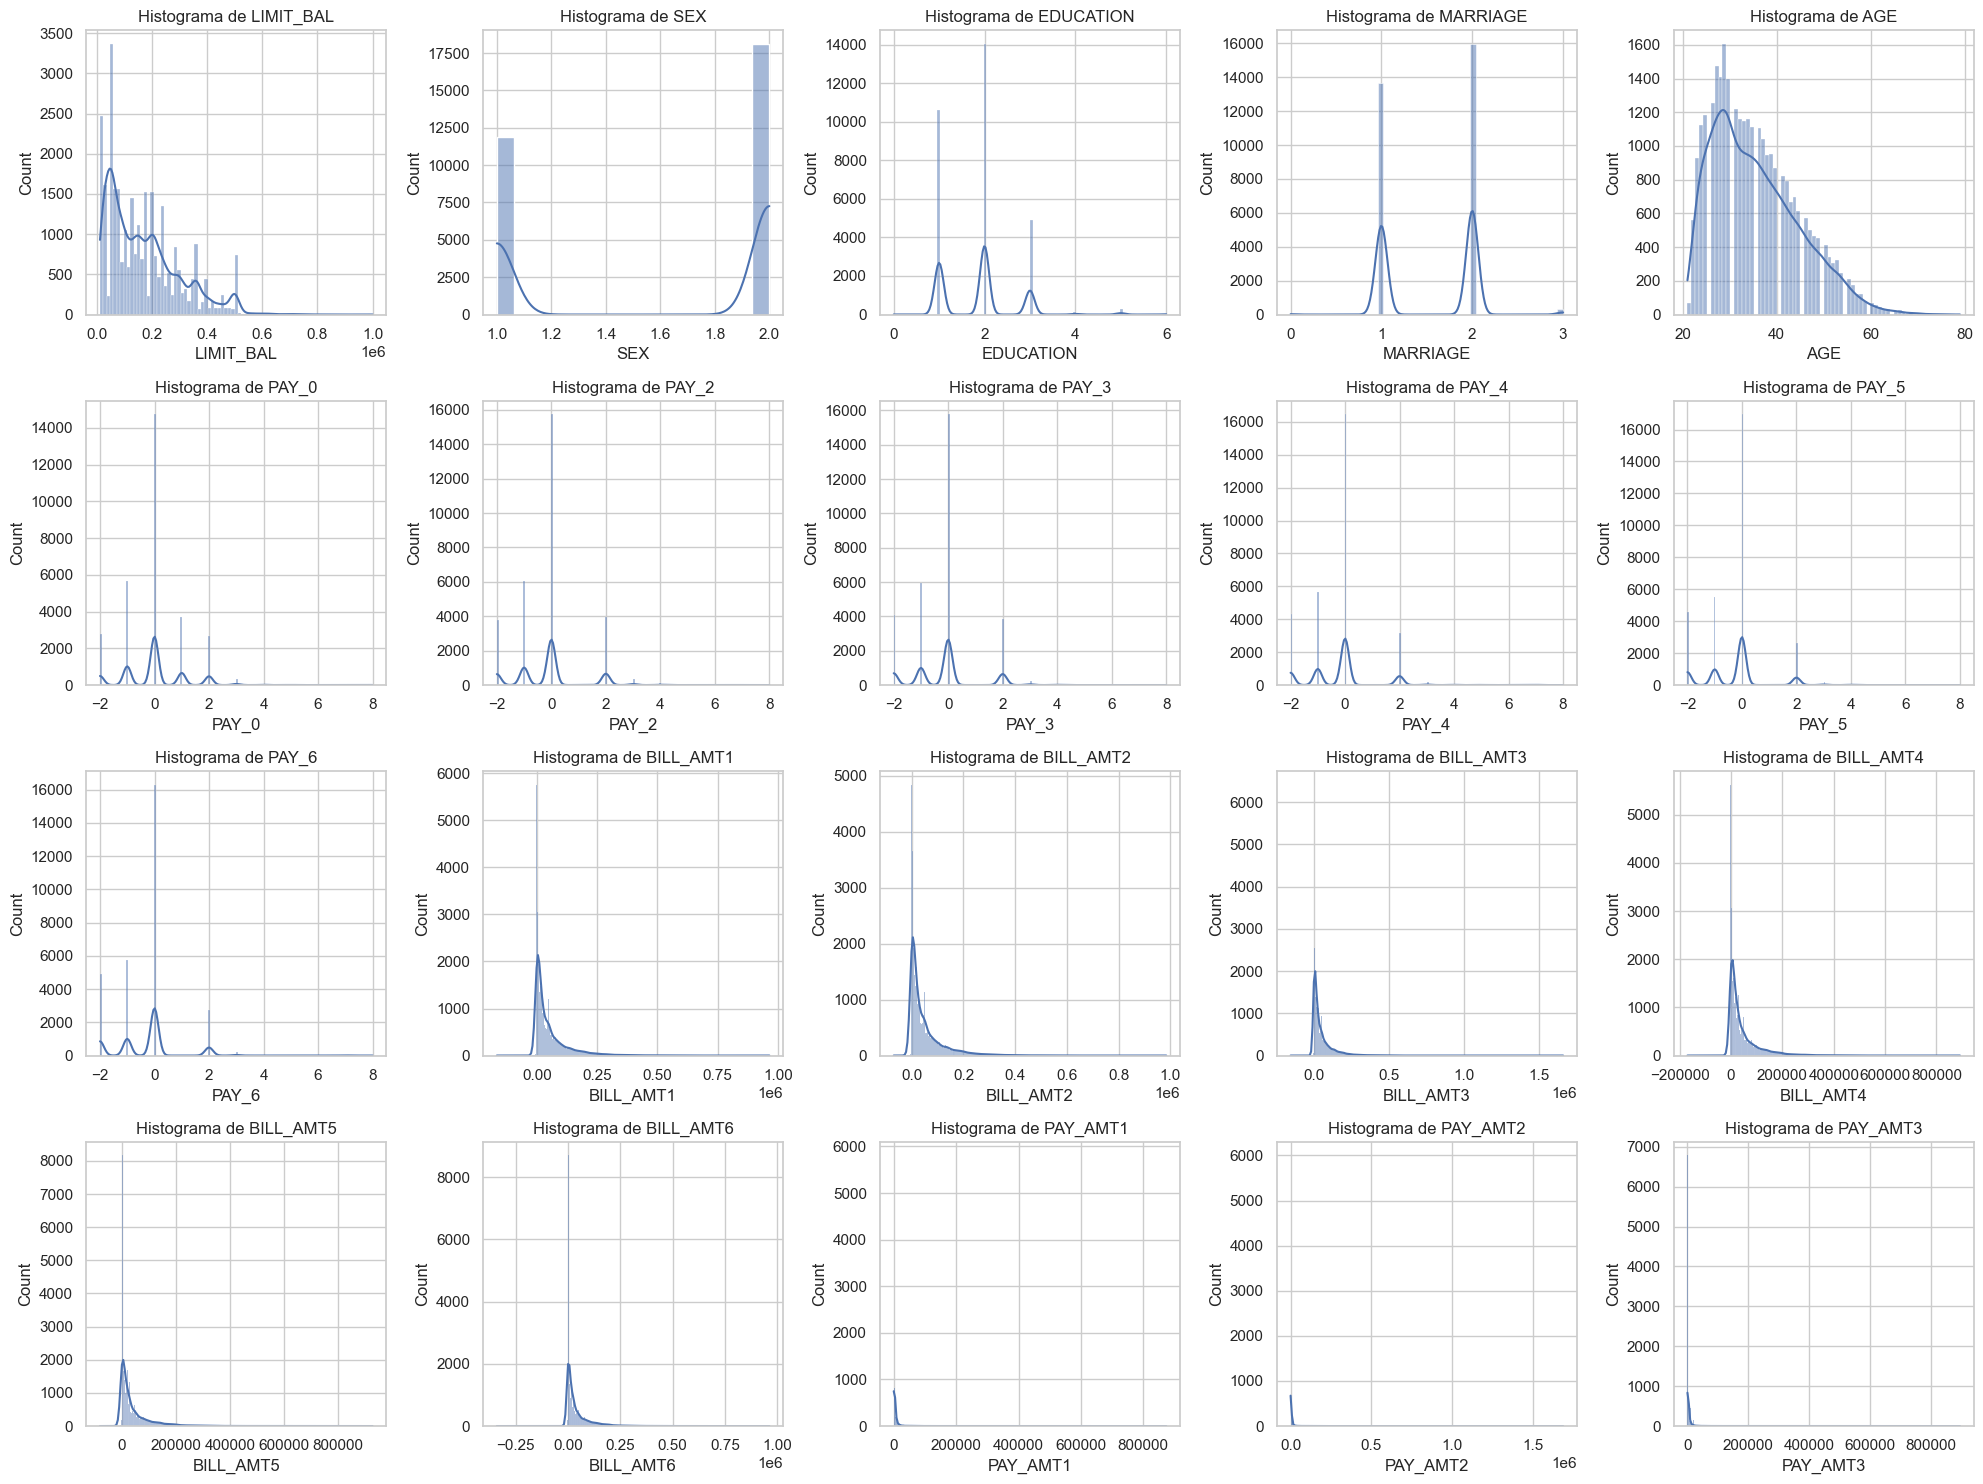

In [28]:
# Configuración de estilo de las gráficas
sns.set(style="whitegrid")

# Crear una figura y ejes con subplots
fig, axs = plt.subplots(4, 5, figsize=(20, 15))

# Lista de variables explicativas
variables_explicativas = ['LIMIT_BAL', 'SEX', 'EDUCATION','MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 
                          'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 
                          'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

# Generar gráficas para cada variable explicativa
for i in range(4):
    for j in range(5):
        ax = axs[i, j]
        if i*5 + j < len(variables_explicativas):
            variable_explicativa = variables_explicativas[i*5 + j]
            
            # Histograma
            sns.histplot(data=data, x=variable_explicativa, kde=True, ax=ax)
            ax.set_title(f'Histograma de {variable_explicativa}')

# Ajustar espaciado
plt.tight_layout()

# Mostrar la imagen
plt.show()

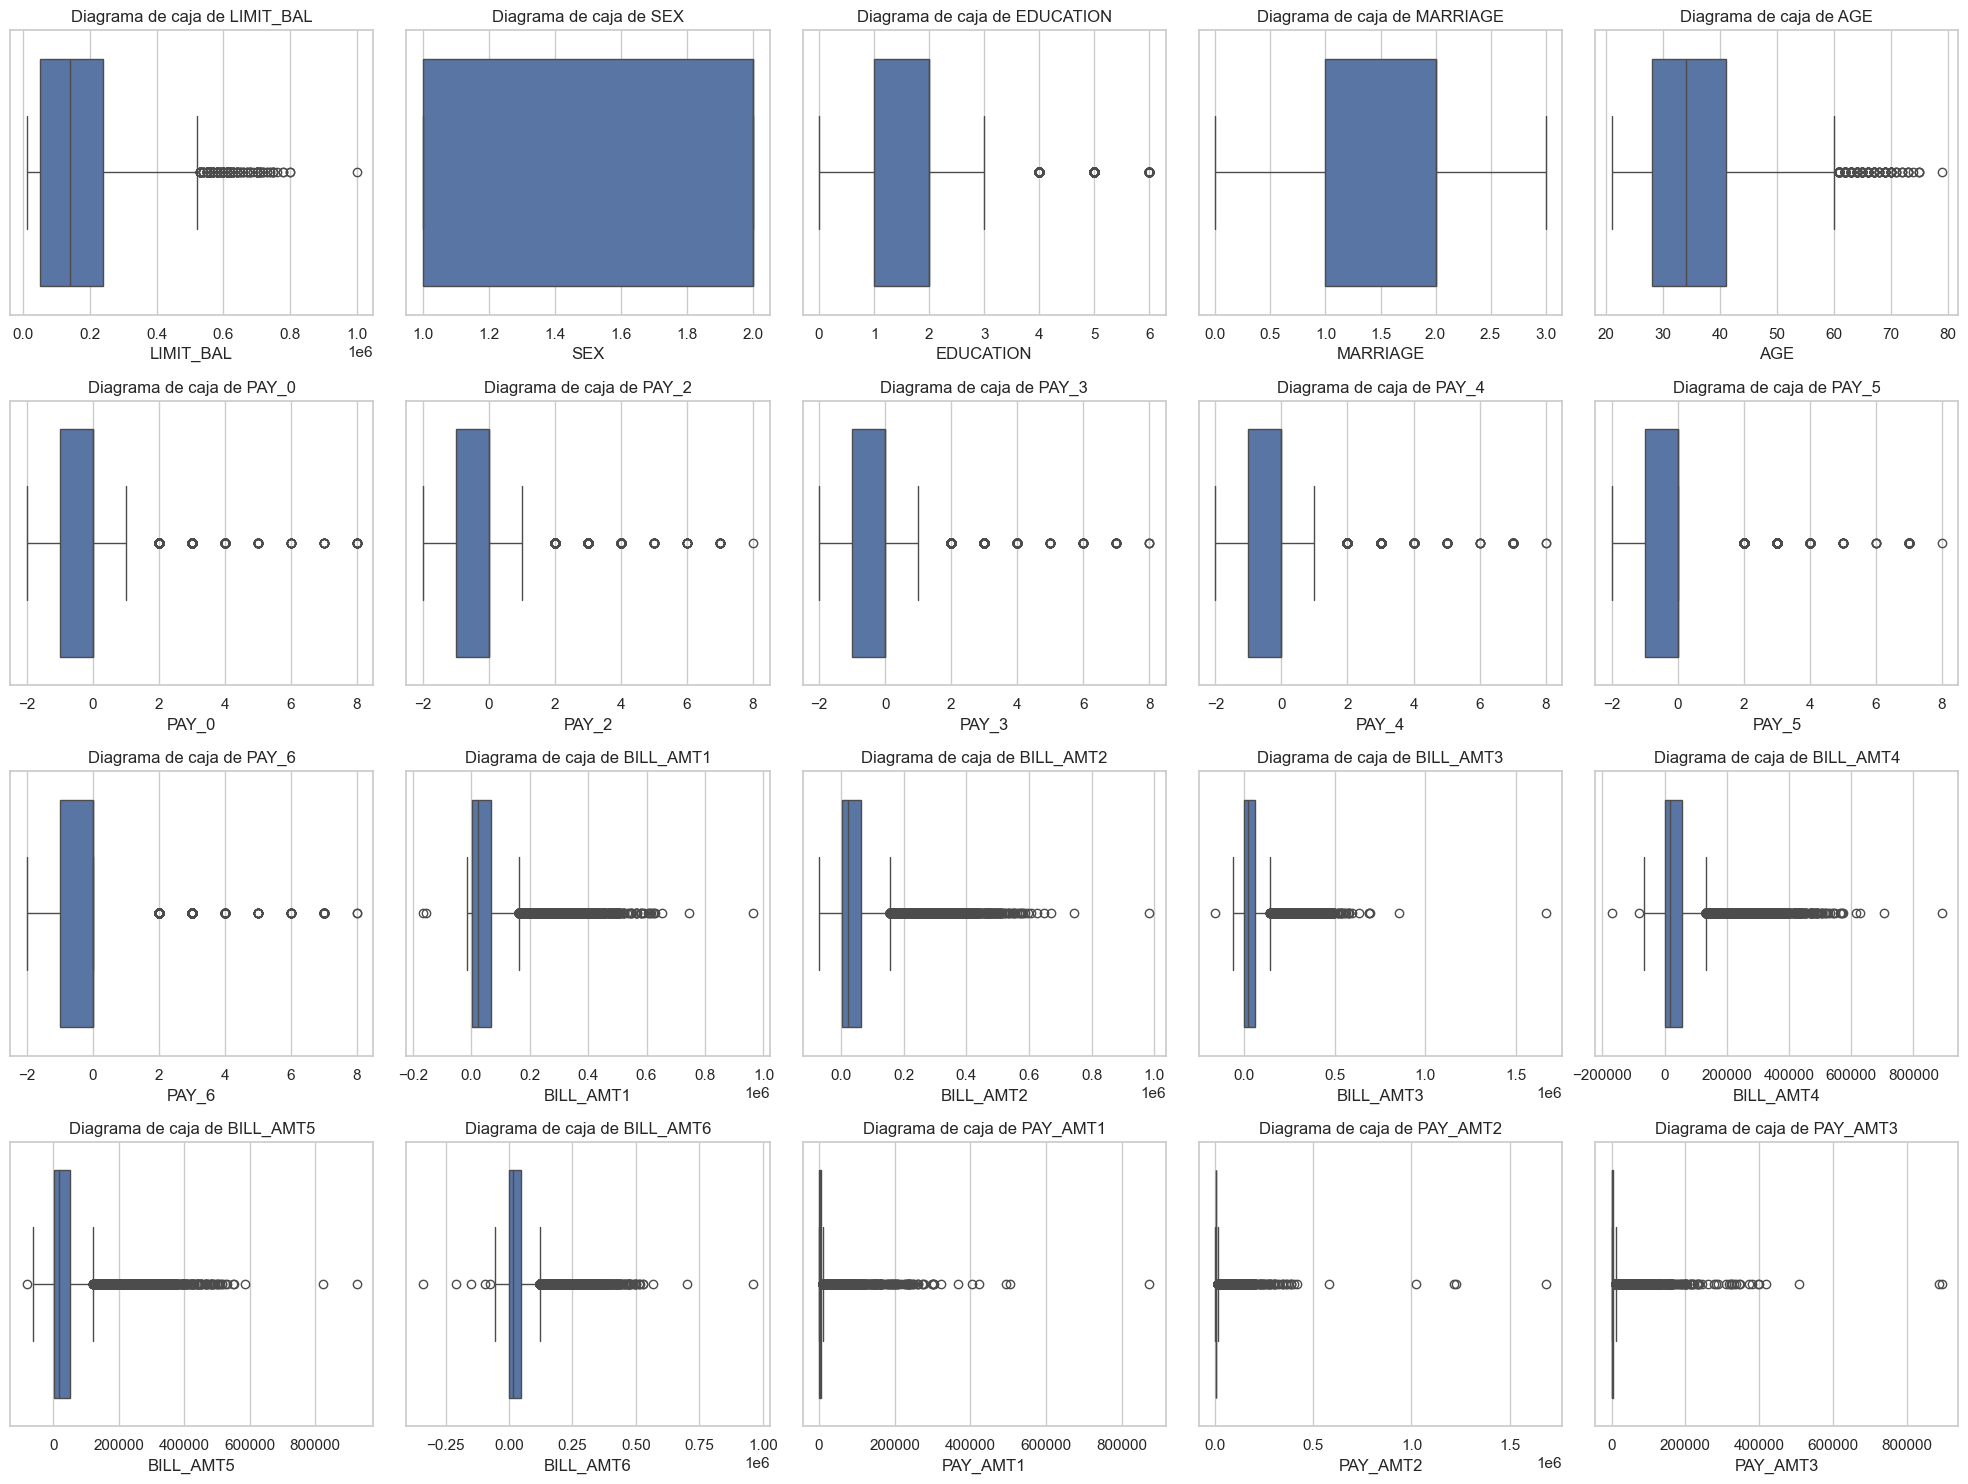

In [29]:
# Configuración de estilo de las gráficas
sns.set(style="whitegrid")

# Crear una figura y ejes con subplots
fig, axs = plt.subplots(4, 5, figsize=(20, 15))

# Lista de variables explicativas
variables_explicativas = ['LIMIT_BAL', 'SEX', 'EDUCATION','MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 
                          'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 
                          'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

# Generar gráficas de diagramas de caja para cada variable explicativa
for i in range(4):
    for j in range(5):
        ax = axs[i, j]
        if i*5 + j < len(variables_explicativas):
            variable_explicativa = variables_explicativas[i*5 + j]
            
            # Diagrama de caja
            sns.boxplot(data=data, x=variable_explicativa, ax=ax)
            ax.set_title(f'Diagrama de caja de {variable_explicativa}')

# Ajustar espaciado
plt.tight_layout()

# Mostrar la imagen
plt.show()

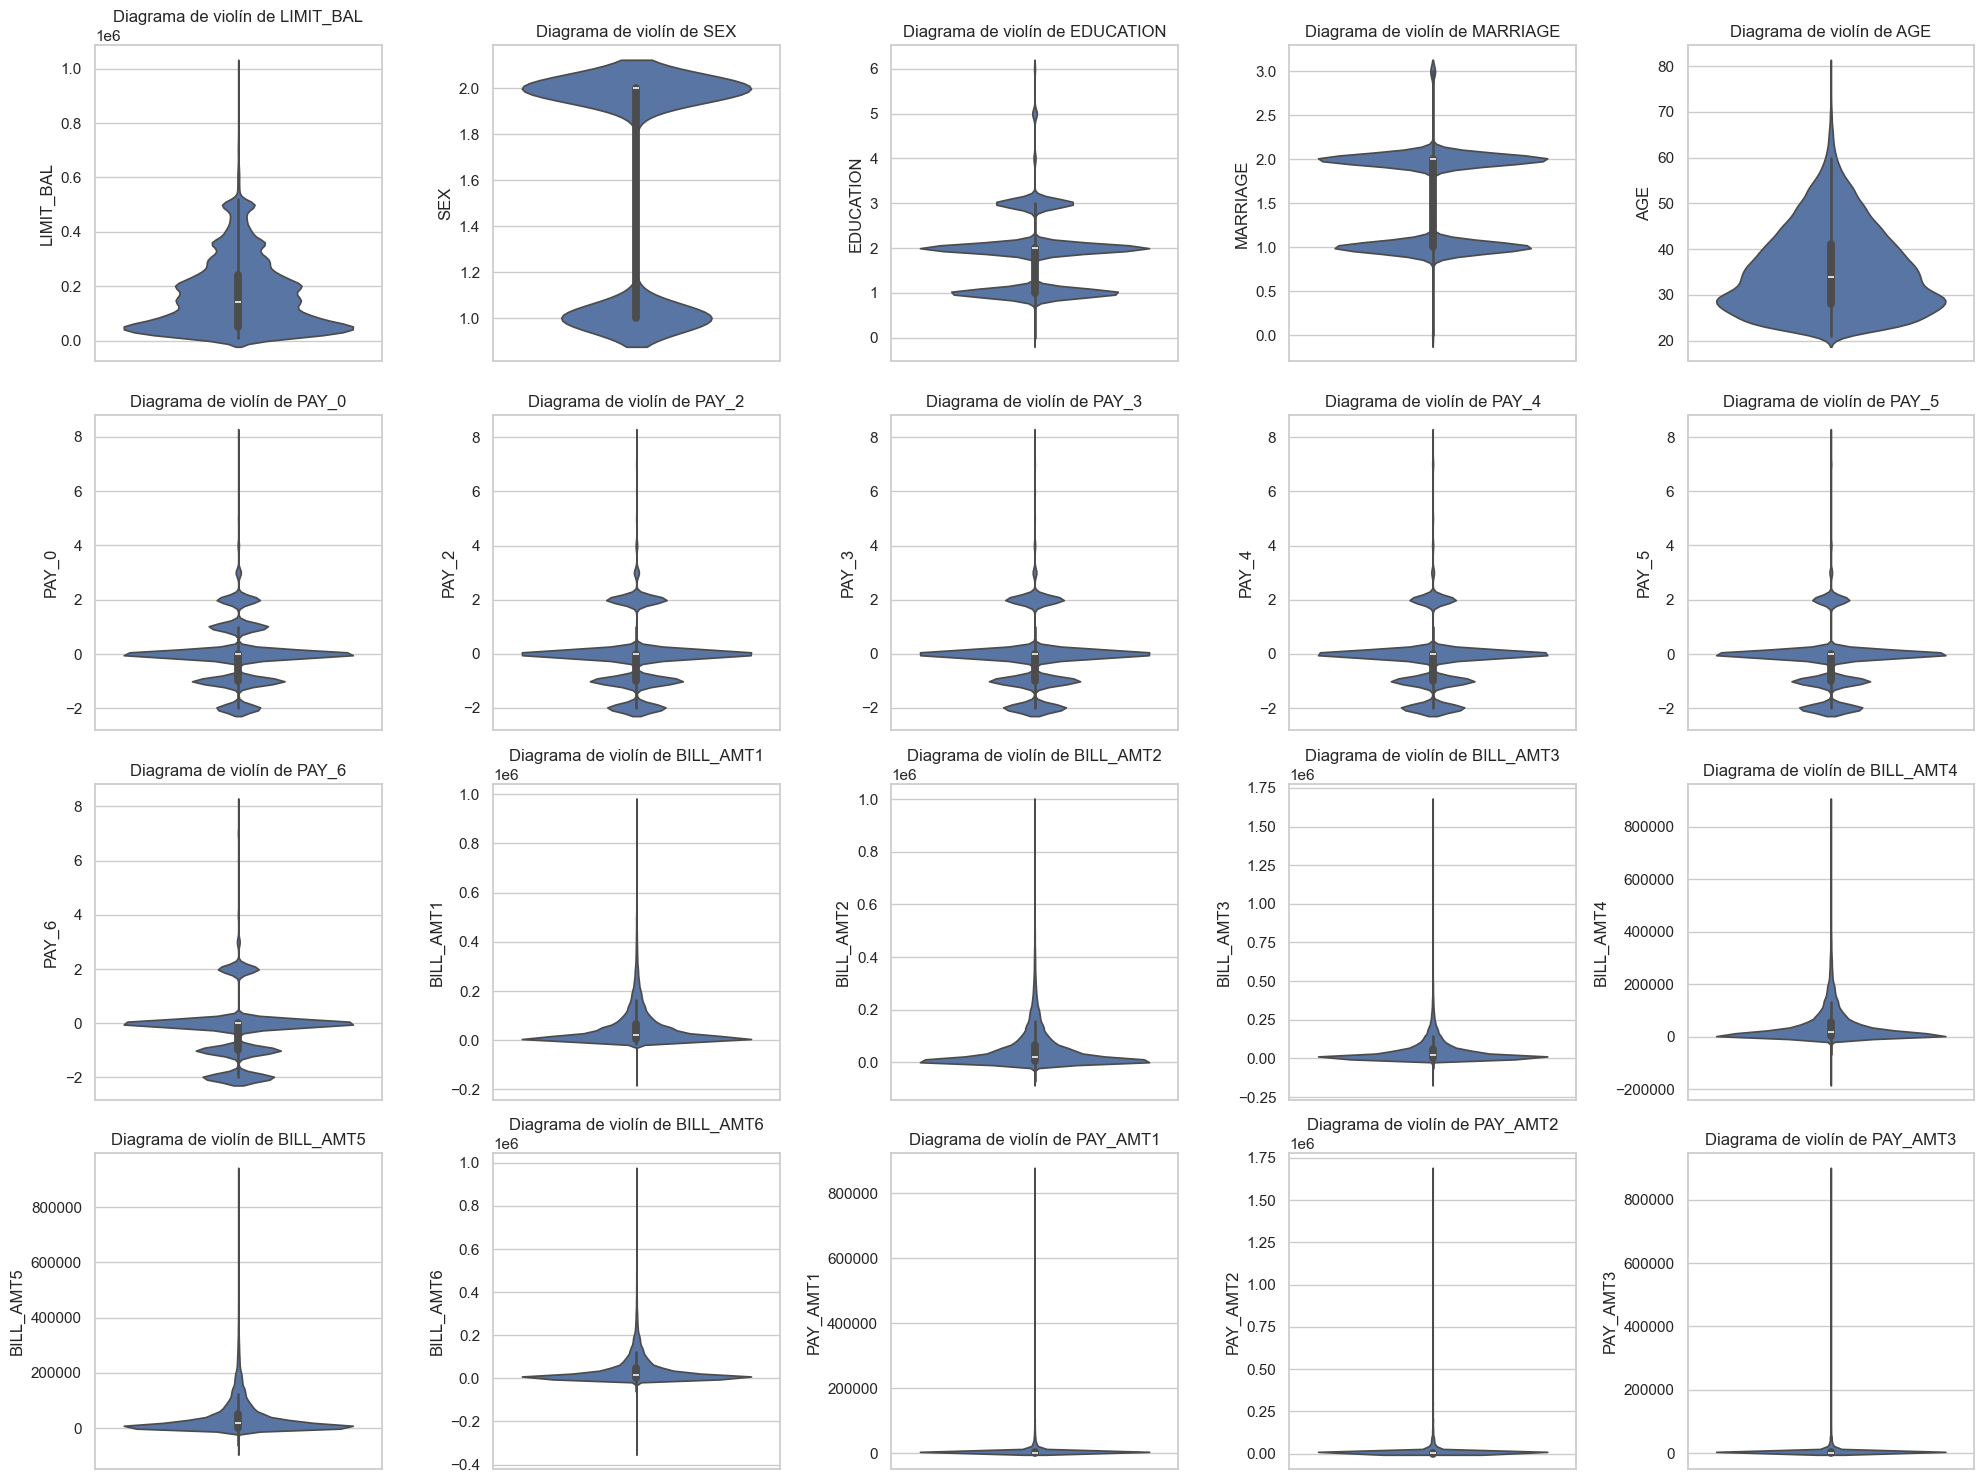

In [30]:
# Configuración de estilo de las gráficas
sns.set(style="whitegrid")

# Crear una figura y ejes con subplots
fig, axs = plt.subplots(4, 5, figsize=(20, 15))

# Lista de variables explicativas
variables_explicativas = ['LIMIT_BAL', 'SEX', 'EDUCATION','MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 
                          'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 
                          'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

# Generar gráficas de diagramas de violín para cada variable explicativa
for i in range(4):
    for j in range(5):
        ax = axs[i, j]
        if i*5 + j < len(variables_explicativas):
            variable_explicativa = variables_explicativas[i*5 + j]
            
            # Diagrama de violín
            sns.violinplot(data=data, y=variable_explicativa, ax=ax)
            ax.set_title(f'Diagrama de violín de {variable_explicativa}')

# Ajustar espaciado
plt.tight_layout()

# Mostrar la imagen
plt.show()

In [31]:
import pandas as pd
from scipy.stats import spearmanr

# Lista para almacenar las correlaciones
correlation_results = []

# Variables explicativas
variables_explicativas = ['LIMIT_BAL', 'SEX', 'EDUCATION','MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 
                          'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 
                          'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

# Calcular la correlación de Spearman para cada variable explicativa
for variable in variables_explicativas:
    correlation, _ = spearmanr(data[variable], data['default_payment_next_month'])
    correlation_results.append((variable, correlation))

# Convertir los resultados a un DataFrame para una fácil visualización
correlation_df = pd.DataFrame(correlation_results, columns=['Variable', 'Correlation'])

# Imprimir los resultados
print(correlation_df)


     Variable  Correlation
0   LIMIT_BAL    -0.169586
1         SEX    -0.039961
2   EDUCATION     0.044369
3    MARRIAGE    -0.026490
4         AGE     0.005149
5       PAY_0     0.292213
6       PAY_2     0.216919
7       PAY_3     0.194771
8       PAY_4     0.173690
9       PAY_5     0.159043
10      PAY_6     0.142523
11  BILL_AMT1    -0.025327
12  BILL_AMT2    -0.015554
13  BILL_AMT3    -0.012670
14  BILL_AMT4    -0.008357
15  BILL_AMT5    -0.006851
16  BILL_AMT6    -0.000076
17   PAY_AMT1    -0.160493
18   PAY_AMT2    -0.150977
19   PAY_AMT3    -0.139388
20   PAY_AMT4    -0.127979
21   PAY_AMT5    -0.116587
22   PAY_AMT6    -0.121444
